In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# Import Data
df = pd.read_csv("london_weather_MODIFIED - london_weather_MODIFIED.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Convert the date column to datetime dtype.

In [3]:
df["date"] = df["date"].astype(str)

In [4]:
df["datetime"] = pd.to_datetime(df["date"])
display(df.head())
df.info()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  object        
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 1.3+ MB


# Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [5]:
yearfilter = df["datetime"] >= "2000-01-01"
df[yearfilter]

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
7670,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0,2000-01-01
7671,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0,2000-01-02
7672,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0,2000-01-03
7673,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0,2000-01-04
7674,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020-12-27
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020-12-28
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020-12-29
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020-12-30


In [6]:
df = df[["precipitation", "mean_temp", "min_temp", "max_temp", "snow_depth", "datetime"]]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth,datetime
0,0.4,-4.1,-7.5,2.3,9.0,1979-01-01
1,0.0,-2.6,-7.5,1.6,8.0,1979-01-02
2,0.0,-2.8,-7.2,1.3,4.0,1979-01-03
3,0.0,-2.6,-6.5,-0.3,2.0,1979-01-04
4,0.0,-0.8,-1.4,5.6,1.0,1979-01-05


# Set the date column as the index.

In [7]:
df = df.set_index("datetime")
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0


# Impute any missing values.

In [8]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
df[["precipitation", "snow_depth"]] = df[["precipitation", "snow_depth"]].fillna(method = "ffill")

In [10]:
df[["mean_temp", "min_temp", "max_temp"]] = df[["mean_temp", "min_temp", "max_temp"]].interpolate()
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- ~Find the date and corresponding value for the max precipitation.~
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - ~With a title of "Precipitation for 2000-2010"~
        - ~With a ylabel of "Inches"~
    - Customize the major xaxis ticks to:
        - ~Have major xaxis ticks every 1 year.~
        - ~Use 4-digit years for the labels~
        - ~Have the major ticks' labels rotated 90 degrees.~
    - Customize the minor xaxis ticks to:
        - ~Have minor xaxis ticks every 3 months~
        - ~Do not label the minor ticks.~

In [11]:
max_prec = df["precipitation"].value_counts().max()
max_prec

7983

In [12]:
# Find the date and corresponding value for the max precipitation.
date_range = pd.date_range("2000-01-01", "2010-12-01")
df.loc[date_range, "precipitation"].idxmax()

Timestamp('2000-10-29 00:00:00')

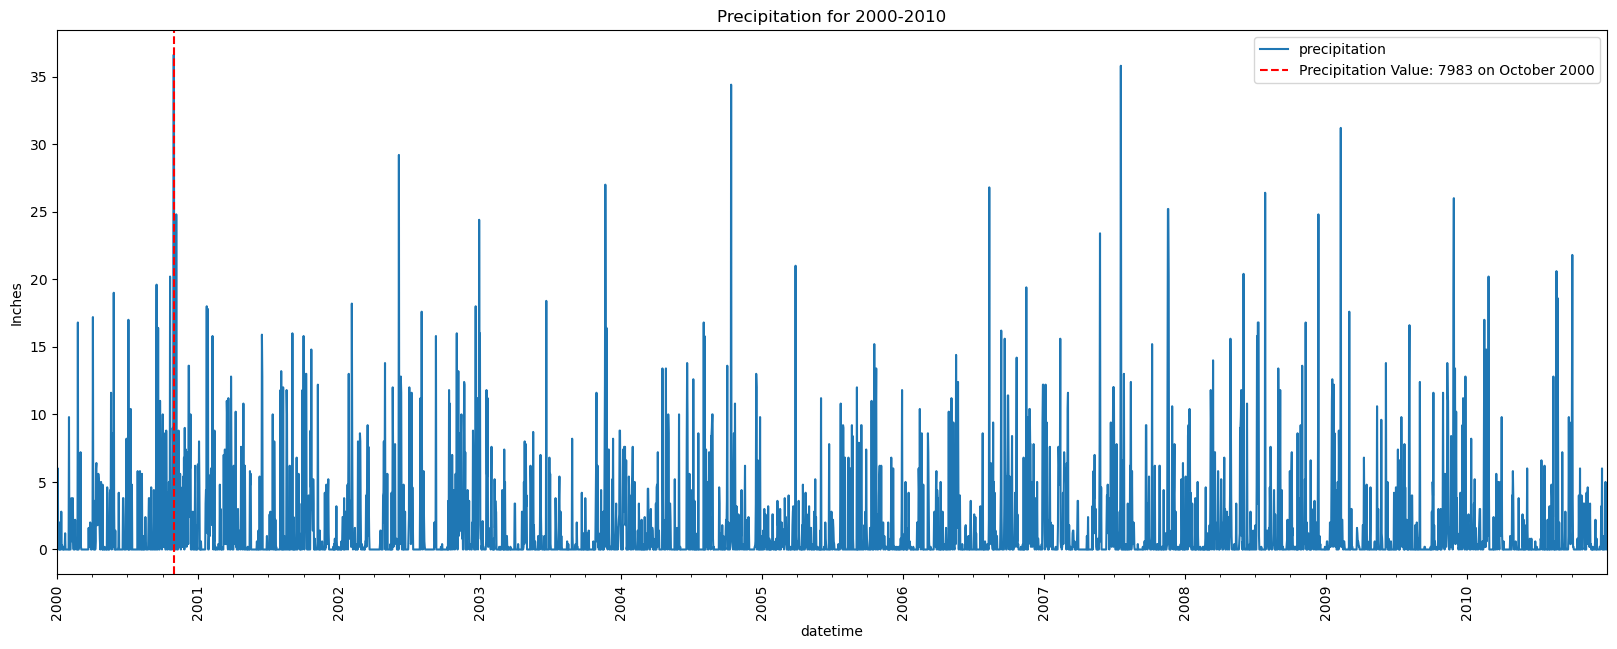

In [13]:
yearly_loc = mdates.YearLocator()
year_format = mdates.DateFormatter("%Y")
month_format = mdates.MonthLocator(interval = 3)
date = '2000-10-29'
date2 = "October 2000"

ts = df["precipitation"].copy()
ts = ts.loc["2000":"2010"]
fig, ax = plt.subplots(figsize = (20, 8))
ts.plot(ax = ax, title = "Precipitation for 2000-2010");
ax.xaxis.set_minor_locator(month_format)
ax.xaxis.set_major_locator(yearly_loc)
ax.xaxis.set_major_formatter(year_format)
ax.set_ylabel("Inches")
ax.axvline(date, label =  f"Precipitation Value: {max_prec} on {date2}", ls = "--", color = "r")
fig.autofmt_xdate(rotation = 90, ha = "center")
ax.legend();

# Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.
- Find the date and corresponding value for the max mean temp.
- Plot the feature and time period that corresponds to the question.
     - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.
- and what was the temperature?
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - ~With a title of "Average Temperature"~
        - ~With a ylabel of "Degrees"~
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Have the major ticks' labels rotated 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

In [21]:
date_range2 = pd.date_range("2000-01-01", "2020-12-01")
cool_temp = df.loc[date_range2, "mean_temp"].idxmax()
cool_temp

Timestamp('2010-12-20 00:00:00')

In [32]:
max_prec = df.loc[date_range2, "precipitation"].value_counts().max()
max_prec

3857

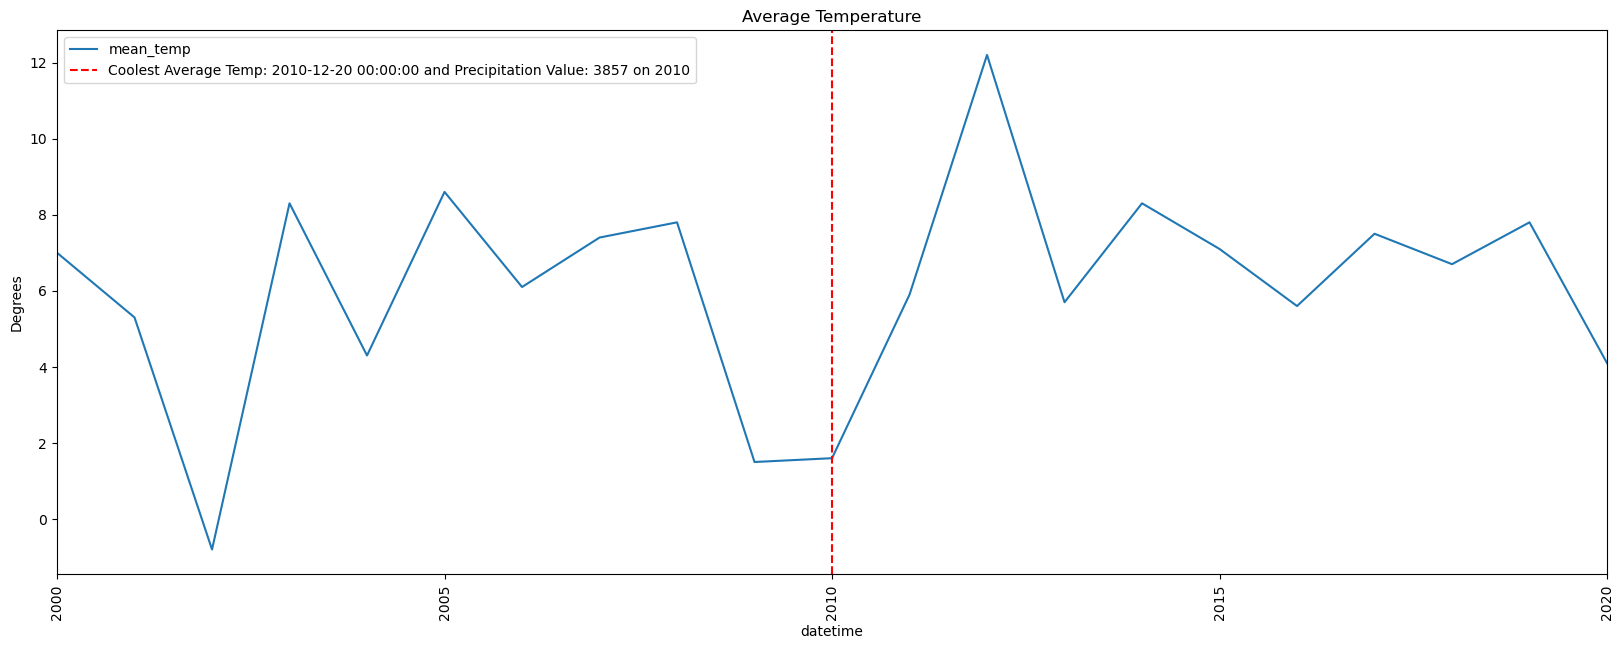

In [33]:
yearly_loc2 = mdates.YearLocator(5)
year_format2 = mdates.DateFormatter("%Y")
minor_yearly_loc =  mdates.YearLocator(1)
coolest_date = "2010-12-20"
date3 = "2010"

ts2 = df["mean_temp"].copy()
ts2 = ts2.asfreq("AS")
ts2 = ts2.loc["2000":"2020"]
fig, ax = plt.subplots(figsize = (20, 8))
ts2.plot(ax = ax, title = "Average Temperature");
ax.xaxis.set_minor_locator(minor_yearly_loc)
#ax.xaxis.set_major_locator(yearly_loc2) ##!! This deletes the years???
#ax.xaxis.set_major_formatter(year_format2) ##!! Makes all the years 1970???
ax.set_ylabel("Degrees")
ax.axvline(coolest_date, label =  f"Coolest Average Temp: {cool_temp} and Precipitation Value: {max_prec} on {date3}", ls = "--", color = "r")
fig.autofmt_xdate(rotation = 90, ha = "center")
ax.legend();